# Diabetes

### Dataset com incidência da doença. Classifique as pessoas portadoras (ou não) da diabetes.

### 1 - Importando o dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
# Import scikit-learn dataset library
from sklearn import datasets

import warnings
warnings.filterwarnings('ignore')

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

df_diabetes = pd.read_csv("./dados/diabetes.csv", header=0, names=col_names)

df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant    768 non-null int64
glucose     768 non-null int64
bp          768 non-null int64
skin        768 non-null int64
insulin     768 non-null int64
bmi         768 non-null float64
pedigree    768 non-null float64
age         768 non-null int64
label       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df_diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df_diabetes['label'].value_counts(dropna=False)

0    500
1    268
Name: label, dtype: int64

### 2 - Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df_diabetes[feature_cols] # Features
y = df_diabetes.label # Target variable

In [7]:
#amostra de 20% e randon state de 42

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42) 

### 3 - Aplicando uma regressão logística

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
# Create a svm Classifier
classificador = LogisticRegression()

# Train the model using the training sets
classificador.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = classificador.predict(X_test)

### 4 - Analisando as métricas

In [10]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[84, 15],
       [21, 34]], dtype=int64)

De acordo com a matriz de confusão, os resultados são:

True Negative = 84 casos <br>
False Positive = 15 casos <br>
False Negative = 21 caso <br>
True Positive = 34 casos <br>

Calculando a __acurácia__ (.accuracy_score()), a __precisão__ (.precision_score()) e a __sensibilidade__ (.recall_score())

In [11]:
# Print the 3 main binary classification metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7662337662337663
Precision: 0.6938775510204082
Recall: 0.6181818181818182


Os resultados não estão bons.

### 5 - Plotando uma curva ROC

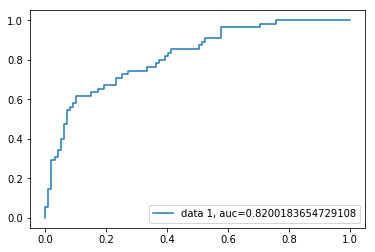

In [12]:
y_pred_proba = classificador.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)

### 6 - Testando vários modelos ao mesmo tempo para decidir o melhor

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

classifiers = [
    KNeighborsClassifier(3),
    GaussianNB(),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()]


for classificador in classifiers:
    classificador.fit(X_train, y_train)
    name = classificador.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    y_pred = classificador.predict(X_test)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))

KNeighborsClassifier
****Results****
Accuracy: 0.7142857142857143
Precision: 0.5901639344262295
Recall: 0.6545454545454545
GaussianNB
****Results****
Accuracy: 0.7662337662337663
Precision: 0.6610169491525424
Recall: 0.7090909090909091
LogisticRegression
****Results****
Accuracy: 0.7662337662337663
Precision: 0.6938775510204082
Recall: 0.6181818181818182
SVC
****Results****
Accuracy: 0.6428571428571429
Precision: 0.0
Recall: 0.0
DecisionTreeClassifier
****Results****
Accuracy: 0.7597402597402597
Precision: 0.6451612903225806
Recall: 0.7272727272727273
RandomForestClassifier
****Results****
Accuracy: 0.7532467532467533
Precision: 0.6666666666666666
Recall: 0.6181818181818182
GradientBoostingClassifier
****Results****
Accuracy: 0.7532467532467533
Precision: 0.6349206349206349
Recall: 0.7272727272727273


### Todos apresentam um resultado abaixo do esperado. Assim, é necessário melhorar os dados em análise.

### 7 - Balanceamento e Scaling

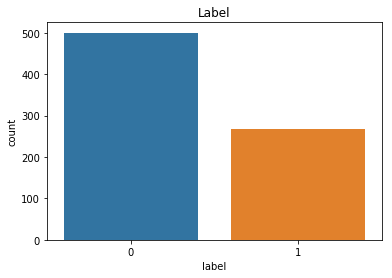

In [14]:
sns.countplot(df_diabetes['label'])
plt.title('Label')
plt.show()

In [15]:
df_label_0 = df_diabetes[df_diabetes['label']==0]
df_label_1 = df_diabetes[df_diabetes['label']==1]

df_label_1 = df_label_1.sample(df_label_0.shape[0], replace=True)
df_diabetes = pd.concat([df_label_0, df_label_1], ignore_index=True)

del df_label_0, df_label_1

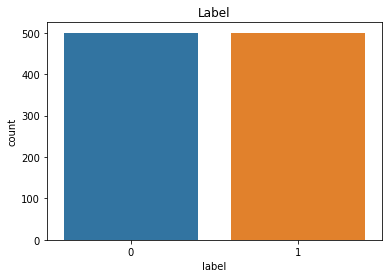

In [16]:
sns.countplot(df_diabetes['label'])
plt.title('Label')
plt.show()

In [17]:
df_diabetes['label'].value_counts(dropna=False)

1    500
0    500
Name: label, dtype: int64

### 8 - testando os modelos com os dados balanceados

In [18]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X1 = df_diabetes[feature_cols] # Features
y1 = df_diabetes.label # Target variable

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size=0.3,random_state=42) 

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

classifiers = [
    KNeighborsClassifier(3),
    GaussianNB(),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()]


for classificador in classifiers:
    classificador.fit(X_train, y_train)
    name = classificador.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    y_pred = classificador.predict(X_test)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))

KNeighborsClassifier
****Results****
Accuracy: 0.7666666666666667
Precision: 0.7247191011235955
Recall: 0.86
GaussianNB
****Results****
Accuracy: 0.75
Precision: 0.7862595419847328
Recall: 0.6866666666666666
LogisticRegression
****Results****
Accuracy: 0.74
Precision: 0.7686567164179104
Recall: 0.6866666666666666
SVC
****Results****
Accuracy: 0.8866666666666667
Precision: 1.0
Recall: 0.7733333333333333
DecisionTreeClassifier
****Results****
Accuracy: 0.8333333333333334
Precision: 0.8125
Recall: 0.8666666666666667
RandomForestClassifier
****Results****
Accuracy: 0.8833333333333333
Precision: 0.891156462585034
Recall: 0.8733333333333333
GradientBoostingClassifier
****Results****
Accuracy: 0.8433333333333334
Precision: 0.8238993710691824
Recall: 0.8733333333333333
